# Anisotropy quantification

To quantify the structure of muscle fibers, we used an implementation of the 2D wavelet transform modulus maxima (WTMM) anisotropy method. It is used to assign a number that quantifies how random morphological shapes in an image are.

### Algorithm 1 WTMM edges computation algorithm 
```python
Require: f(i,j)theinputimage
Require: a scale parameter
    compute WT of f at scale a : T=∇(f ⋆Gσ) 
    compute N and N′
    for pixel (i, j ) ∈ image range do
        if N ′ < 0 and N changes sign in 3 × 3-neighborhood then
            pixel (i, j ) is labelled as a WTMM
            perform a third-order polynomial interpolation along direction T to get an accurate wavelet transform modulus value at maximum
        end if 
    end for
WTMM edge image
```

In [148]:
# import packages
from imaris_ims_file_reader.ims import ims
import matplotlib.pyplot as plt
from pyclesperanto_prototype import imshow
import numpy as np

In [149]:
def show(images_to_show,titles):
    if len(images_to_show) == 1:
        fig, axs = plt.subplots(1, len(images_to_show), figsize=(15, 15))
        for i,img in enumerate(images_to_show):
            imshow(img, plot=axs,colormap='viridis')
            axs.set_title(titles[i])
           
    else:
        fig, axs = plt.subplots(1, len(images_to_show), figsize=(15, 15))
        for i,img in enumerate(images_to_show):
            imshow(img, plot=axs[i],colormap='viridis')
            axs[i].set_title(titles[i])
    plt.show()
    

In [250]:
path = "/Volumes/G_MLS_RB_UHOME$/qfavey/01_Experiments/F_Spinal Muscle Staining/F01-005/2024-05-16/Inpp5e_4D9-568_DAPI_Phalloidin-488_20x_F01.ims"
img = ims(path)
filename = path.split("/")[-1]

data = {}
print("input shape: ",img.shape)

data["Phalloidin"] = img[0,2,10,500:1300,500:1250] 
#data["Pkd2l1"] = cle.maximum_z_projection(img[0,0,:,:,:]) #extract the Pkd2l1 stack middle-width:middle+width
del img
#print("Pkd2l1: ", data["Pkd2l1"].shape)
print("Phalloidin: ", data["Phalloidin"].shape)


input shape:  (1, 3, 67, 2040, 1992)
Phalloidin:  (800, 750)


In [299]:
# Generate Gaussian noise with mean 0 and standard deviation 1, same shape as data["Phalloidin"]
gaussian_noise = np.random.normal(loc=0.0, scale=1.0, size=data["Phalloidin"].shape)

# Assign the Gaussian noise to data["Phalloidin"]
data["Noise"] = gaussian_noise

Text(0, 0.5, 'Y (pix)')

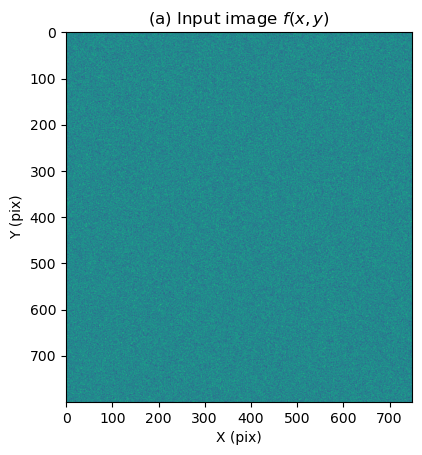

In [275]:
plt.imshow(data['Phalloidin'])

plt.title(r'(a) Input image $f(x,y)$')
plt.xlabel("X (pix)")
plt.ylabel("Y (pix)")

Let $f(x,y)$ be the input image to be analyzed and $T$ the wavelet transform vector of $f$ at
scale $a$.


$$
T=\left( \begin{array}{c}
f_{x} \\
f_{y}
\end{array} \right)
$$

Where $f_{x}$ and $f_{y}$ are the wavelet transform components (we will just pass the image through a DOG filter, and calculate the gradient of the filtered image).

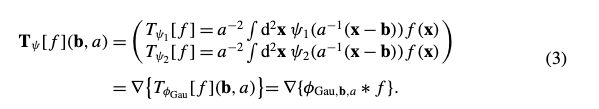


In [276]:
from scipy.ndimage import gaussian_filter
sig1 = 2
sig2 = 100
Sdata = gaussian_filter(data['Phalloidin'],sig1)
#Sdata = difference_of_gaussians(data['Phalloidin'],sig1,sig2)
step = 10

Text(0, 0.5, 'Y (pix)')

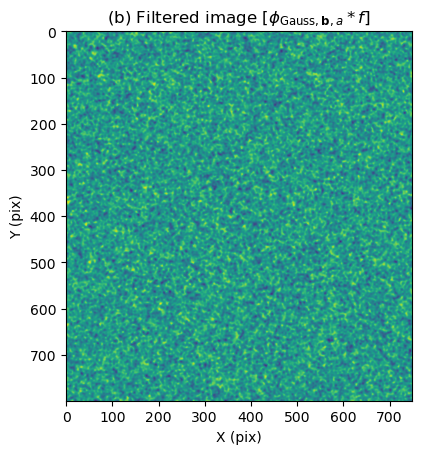

In [277]:
plt.imshow(Sdata)
plt.title(r'(b) Filtered image $[\phi_{\text{Gauss},\mathbf{b},a} * f]$')
plt.xlabel("X (pix)")
plt.ylabel("Y (pix)")

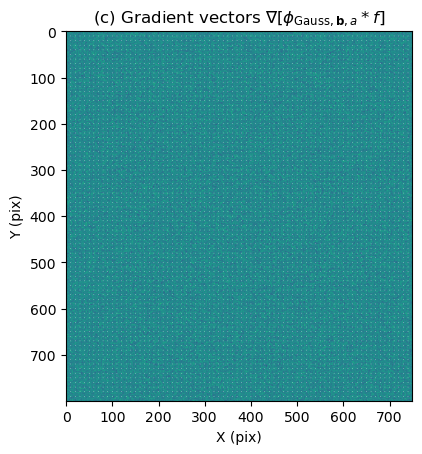

In [278]:

from skimage.filters import difference_of_gaussians

# calculate the wavelet transform
T = np.gradient(Sdata)

# exctract f_x, f_y
U,V = T[0],T[1]

# plot
fig,axs = plt.subplots()
X, Y = np.meshgrid(np.arange(0,np.shape(Sdata)[1],1),np.arange(0,np.shape(Sdata)[0],1))
Q = axs.quiver(X[::step, ::step], Y[::step, ::step], U[::step, ::step], V[::step, ::step], units='width', width=0.002,
               scale=8000,color = "white")
#qk = axs.quiverkey(Q, 0.3, 0.3, 1, r'$1 \frac{m}{s}$', labelpos='E',
 #                  coordinates='figure', color = 'white')
axs.set_title(r'(c) Gradient vectors $\nabla [ \phi_{\text{Gauss},\mathbf{b},a} * f]$')
axs.imshow(data['Phalloidin'])
plt.xlabel("X (pix)")
plt.ylabel("Y (pix)")
plt.show()

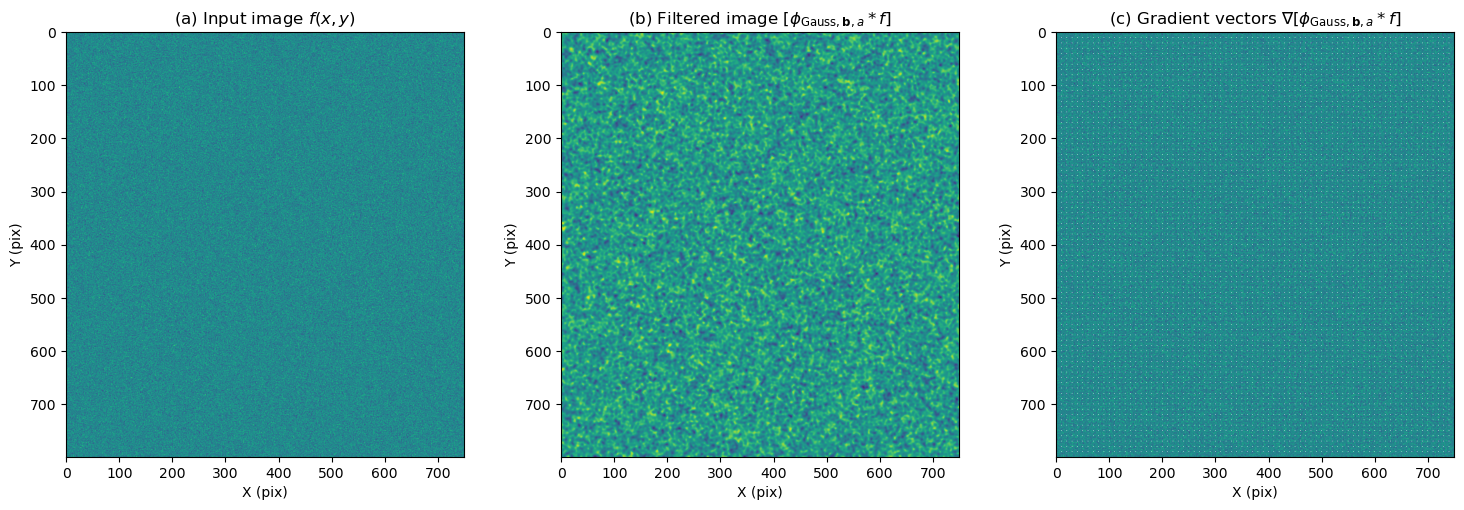

In [279]:
import numpy as np
import matplotlib.pyplot as plt

# plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot 1: Input Image
axs[0].imshow(data['Phalloidin'])
axs[0].set_title(r'(a) Input image $f(x,y)$')
axs[0].set_xlabel("X (pix)")
axs[0].set_ylabel("Y (pix)")

# Plot 2: Filtered Image
axs[1].imshow(Sdata)
axs[1].set_title(r'(b) Filtered image $[\phi_{\text{Gauss},\mathbf{b},a} * f]$')
axs[1].set_xlabel("X (pix)")
axs[1].set_ylabel("Y (pix)")

# Plot 3: Gradient Vectors
step = 10
X, Y = np.meshgrid(np.arange(0, np.shape(Sdata)[1], 1), np.arange(0, np.shape(Sdata)[0], 1))
Q = axs[2].quiver(X[::step, ::step], Y[::step, ::step], U[::step, ::step], V[::step, ::step], units='width', width=0.002,
                  scale=8000, color="white")
axs[2].set_title(r'(c) Gradient vectors $\nabla [ \phi_{\text{Gauss},\mathbf{b},a} * f]$')
axs[2].imshow(data['Phalloidin'])
axs[2].set_xlabel("X (pix)")
axs[2].set_ylabel("Y (pix)")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


/Users/quillan/anaconda3/envs/napari-env/lib/python3.9/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


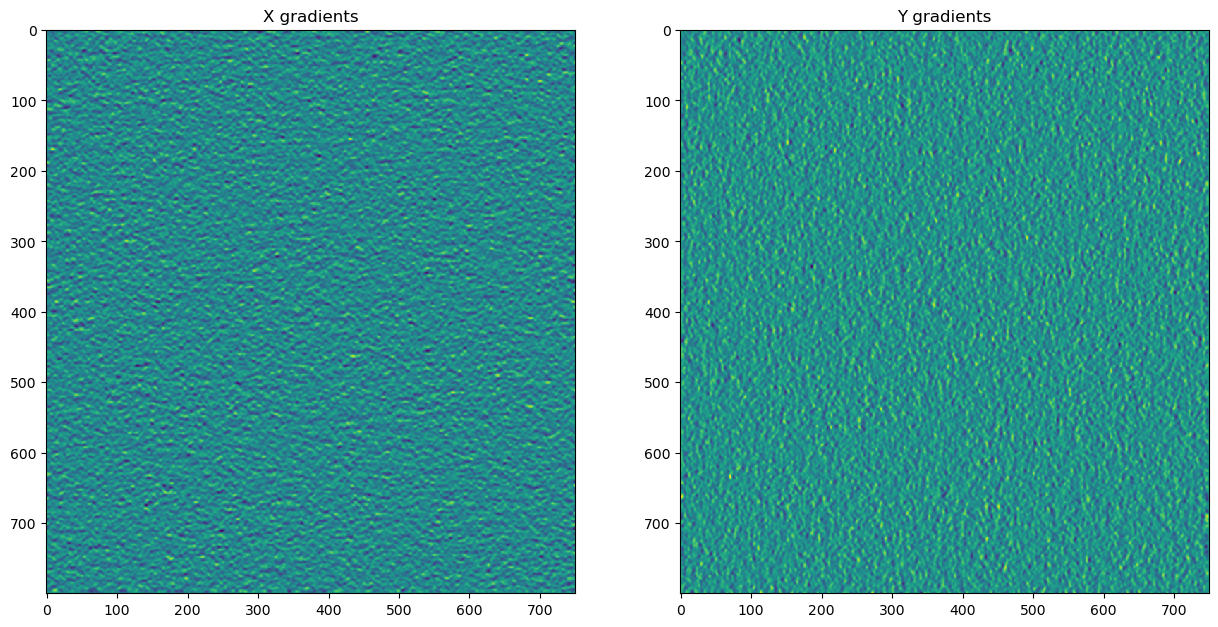

In [280]:
show([U,V],["X gradients","Y gradients"])


Compute the square modulus from:

$$
M^{2}=f_{x}^{2}+f_{y}^{2}
$$

In [281]:
M_2 = np.add(np.square(U),np.square(V))
print("M_2 shape:" ,np.shape(M_2))

M_2 shape: (800, 750)


Next we calculate the scalar quantity $N$
$$
N =∇(M2)•T=2fx^{2}fxx +4fxfyfxy +2fy^{2}fyy.
$$

and

$$
N′ =∂x Nfx +∂y Nfy
$$

In [282]:
f_x, f_y = U[:,:],V[:,:]
f_xy = np.gradient(f_x)[1]
f_yy = np.gradient(f_y)[1]
f_xx = np.gradient(f_x)[0]


N = (2*np.square(f_x)*f_xx)+(4*f_x*f_y*f_xy)+(2*np.square(f_y)*f_yy)
dN = np.gradient(N*f_x)[0]+np.gradient(N*f_y)[1]

# check if N and dN are indeed scalars (for every pixel)
print("f_x shape:",np.shape(f_x))
print("N   shape:" ,np.shape(N))
print("dN  shape:" ,np.shape(dN))


f_x shape: (800, 750)
N   shape: (800, 750)
dN  shape: (800, 750)


In [283]:
# Function to check if N changes sign in the 3x3 neighborhood
def changes_sign_in_neighborhood(N, i, j, thresh):
    """
    Checks if there is a change in the sign of N in the 3x3 neighborhood and returns the pixel value else, returns 0
    """
    neighborhood = N[max(0, i-1):min(N.shape[0], i+2), max(0, j-1):min(N.shape[1], j+2)]
    signs = np.sign(neighborhood)
    if np.any(signs != signs[0]):
        if N[i,j]>thresh:
            return N[i,j] 
        else:
            return 0
    else:
        return 0

In [284]:
# Label pixels as WTMM based on the conditions (just implementing the pseudocode at this point)
thresh=0
M = np.sqrt(M_2)
WTMM = np.zeros_like(dN) 
WTMM_coords = []
for i in range(1,N.shape[0]-1):
    for j in range(1,N.shape[1]-1):
        if dN[i,j] < 0:
            WTMM[i,j] = changes_sign_in_neighborhood(N, i, j, thresh)
            #if np.abs(WTMM[i,j]) > 0:
                # if M[i,j]>thresh:               # keep the modulus that are above a certain threshold to remove noise
            WTMM_coords.append([i,j])

WTMM_coords = np.array(WTMM_coords)
print(np.shape(WTMM))

(800, 750)


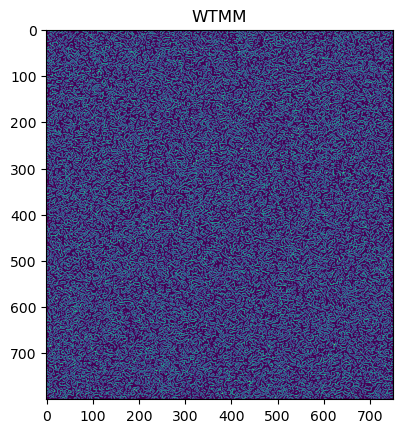

In [285]:
plt.imshow(WTMM>0)
plt.title("WTMM")
plt.show()

In [286]:

# get the modulus
M = np.sqrt(M_2)

### Find local maximas of the WTMM (WTMMM)

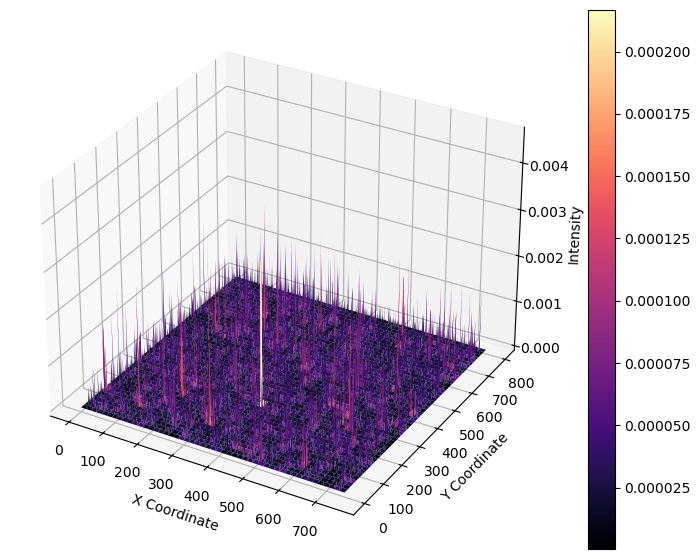

In [287]:
from mpl_toolkits.mplot3d import Axes3D

log_WTMM = np.log(WTMM + 1e-10)

# Create a grid of x and y coordinates
x = np.linspace(0, WTMM.shape[1] - 1, WTMM.shape[1])
y = np.linspace(0, WTMM.shape[0] - 1, WTMM.shape[0])
x, y = np.meshgrid(x, y)

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, WTMM, cmap='magma')

# Add a colorbar
fig.colorbar(surf)

# Add labels
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Intensity')

# Show the plot
plt.show()

In [288]:
import numpy as np
from scipy.signal import find_peaks

def detect_local_maxima_1d(data,threshold):
    """
    Detect local maxima in a 2D array by flattening to 1D.

    Parameters:
    - data: 1D array of data.

    Returns:
    - A boolean array with True at local maxima positions.
    """
    # Get the shape of the original data
    original_shape = data.shape
    
    # Flatten the data to 1D
    flattened_data = np.abs(data)
    # calculate threshold
    threshold = np.quantile(flattened_data,threshold)
        
    # Find peaks in the flattened data
    peaks, _ = find_peaks(flattened_data,threshold=threshold)

    # # Initialize a boolean array of the same shape as the original data
    # local_maxima = np.zeros_like(flattened_data, dtype=bool)

    # # Mark the peak positions in the boolean array
    # local_maxima[peaks] = True

    # # Reshape the boolean array back to the original shape
    # local_maxima_2d = local_maxima.reshape(original_shape)

    # # Map 1D indices to 2D coordinates
    # coords = [np.unravel_index(peak, original_shape) for peak in peaks]

    # return coords
    return peaks


fast version:

In [289]:
import numpy as np
from scipy.ndimage import label, find_objects

# Label the local maxima
labeled, num_objects = label(WTMM)

# Initialize an array to store local maxima coordinates
local_maxima_coords = []

# Get slices for each labeled region
slices = find_objects(labeled)

# Iterate through each labeled region
for label_num in range(1, num_objects + 1):
    if slices[label_num - 1] is None:
        continue

    slice_obj = slices[label_num - 1]
    sub_array = WTMM[slice_obj]

    # Find coordinates within the sub-array
    label_coords = np.argwhere(labeled[slice_obj] == label_num)

    # Detect local maxima in the sub-array using the 1D approach
    sub_array_flat = sub_array.flatten()
    peak_indexes = detect_local_maxima_1d(sub_array_flat, threshold=0.8)

    # Convert 1D peak indexes back to 2D coordinates within the sub-array
    maxima_coords_2d = np.column_stack(np.unravel_index(peak_indexes, sub_array.shape))

    # Adjust coordinates to the global array
    maxima_coords_global = maxima_coords_2d + np.array([slice_obj[0].start, slice_obj[1].start])

    # Store the coordinates in the list
    local_maxima_coords.extend(maxima_coords_global)

local_maxima_coords = np.array(local_maxima_coords)
print("Number of detected WTMMM:")
print(len(local_maxima_coords))



Number of detected WTMMM:
5910


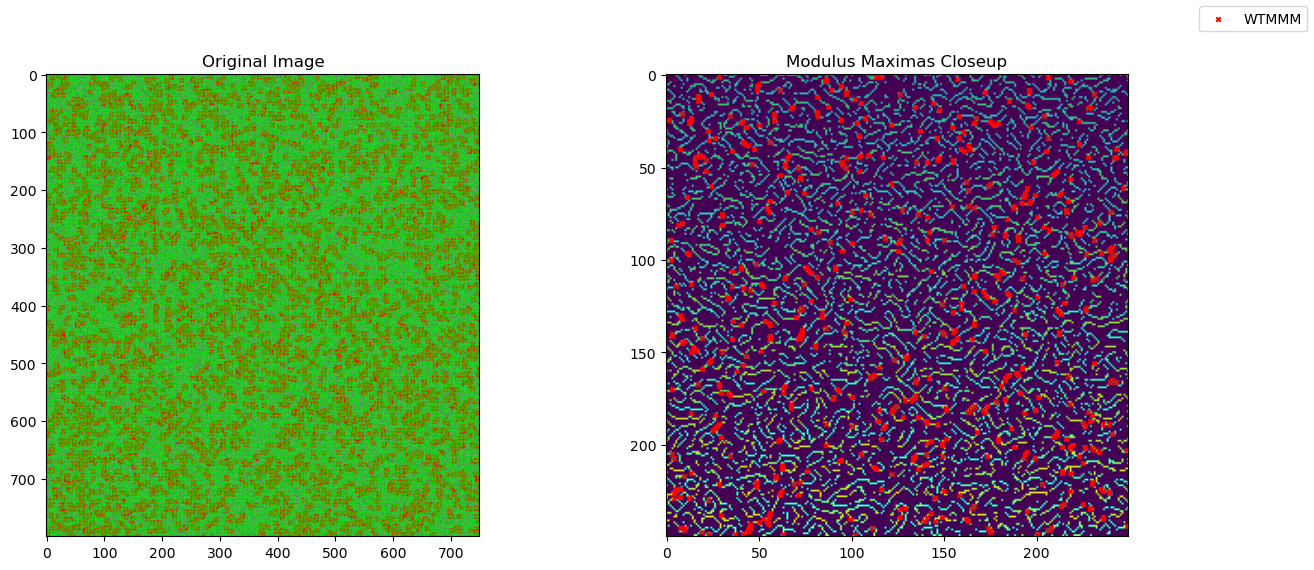

In [290]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Set title for the first subplot
axs[1].set_title("Modulus Maximas Closeup")

# Display the closeup image with filtered maxima
axs[1].imshow(labeled[500:750, 250:500])
filtered_coords = local_maxima_coords[np.where((local_maxima_coords[:, 0] > 500) & (local_maxima_coords[:, 0] < 750))]
filtered_coords = filtered_coords[np.where((filtered_coords[:, 1] > 250) & (filtered_coords[:, 1] < 500))]
axs[1].scatter(filtered_coords[:, 1]-250, filtered_coords[:, 0] - 500, s=10, color='red', marker='x', label='WTMMM')

# Set title for the second subplot
axs[0].set_title("Original Image")

# Display the original image
axs[0].imshow(data['Phalloidin'],cmap="gray")
axs[0].scatter(local_maxima_coords[:, 1], local_maxima_coords[:, 0], s=10, color='red', marker='x')
axs[0].scatter(WTMM_coords[:, 1], WTMM_coords[:, 0], s=0.01, color='lime')

fig.legend()
plt.show()


### Get the corresponding angles for each WTMMM

First we will visualize the information as a graph

Here we plot the WTMM angles not the WTMMM angles

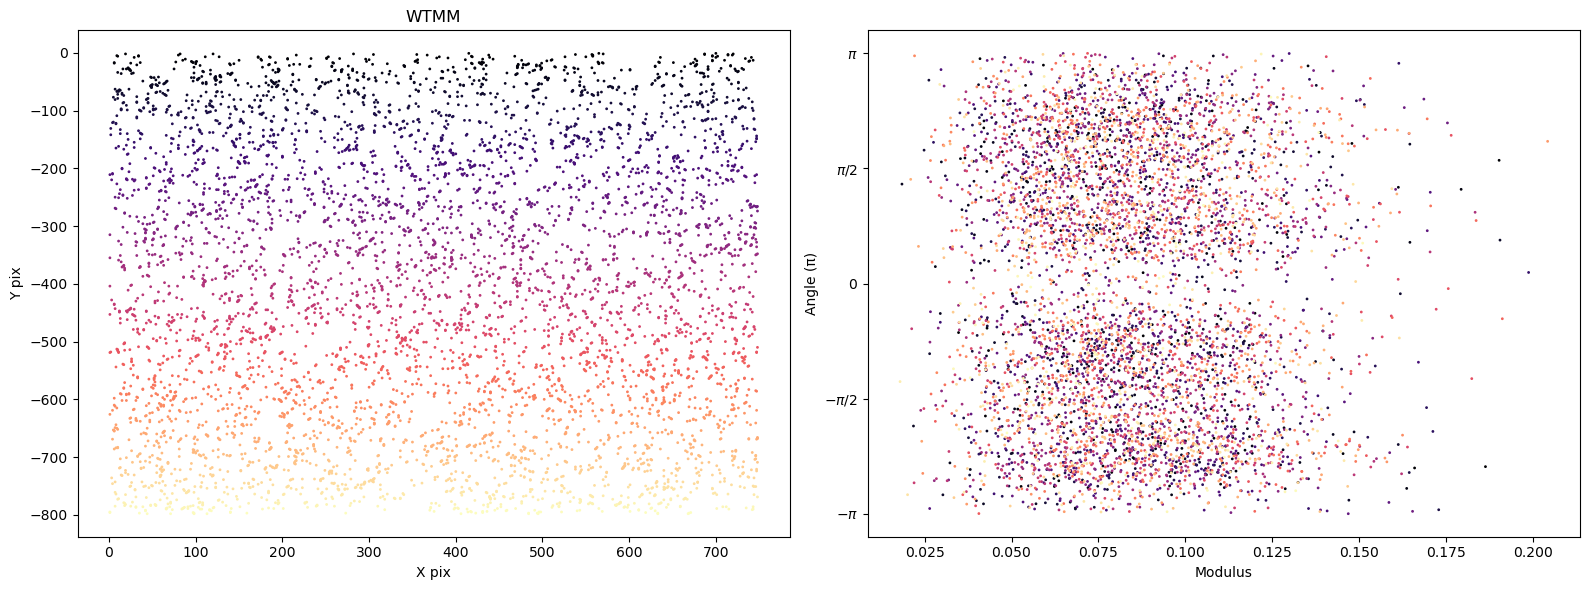

In [291]:

# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].set_title("WTMM")
axs[0].set_xlabel("X pix")
axs[0].set_ylabel("Y pix")
axs[1].set_xlabel("Modulus")
axs[1].set_ylabel("Angle (π)")

# Generate colors using a colormap
cmap = plt.get_cmap("magma")
num_points = len(local_maxima_coords[:, 0])
colors = cmap(np.linspace(0, 1, num_points))

# Extract the coordinates of WTMMM
x_coords = local_maxima_coords[:, 0] 
y_coords = local_maxima_coords[:, 1]

# PLOT WTMMM
axs[0].scatter(y_coords, -x_coords, s=1, color=colors)

# Plot points in axs[1] corresponding to modulus and angle
modulus_values = M[x_coords, y_coords]
angle_values = WTMM_angles[x_coords, y_coords]
axs[1].scatter(modulus_values, angle_values, s=1, color=colors)

# Set y-ticks and labels on the angle axis
pi_ticks = np.arange(-1, 1.5, 0.5) * np.pi
pi_labels = ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$']
axs[1].set_yticks(pi_ticks)
axs[1].set_yticklabels(pi_labels)

# Show the plot
plt.tight_layout()
plt.show()


This plot is better

In [292]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.cm import get_cmap
# from tqdm import tqdm

# # Create the figure and axes
# fig, axs = plt.subplots(1, 2, figsize=(16, 6))
# axs[0].set_title("(a)")
# axs[0].set_xlabel("X (pix)")
# axs[0].set_ylabel("Y (pix)")
# axs[1].set_title("(b)")
# axs[1].set_xlabel("Modulus")
# axs[1].set_ylabel("Angle (π)")

# # Generate unique colors for each label
# cmap_labels = get_cmap('inferno')
# unique_labels = np.unique(labeled)
# num_labels = len(unique_labels)
# label_colors = cmap_labels(np.linspace(0, 1, num_labels))



# # Plot labeled WTMM regions in the first axis
# for label, color in zip(unique_labels, label_colors):
#     if label == 0:
#         continue  # Skip background
#     coords = np.argwhere(labeled == label)
#     axs[0].scatter(coords[:, 1], coords[:, 0], s=1, color=color)

#     # Plot points in axs[1] corresponding to modulus and angle
#     modulus_values = M[coords[:, 0], coords[:, 1]]
#     angle_values = WTMM_angles[coords[:, 0], coords[:, 1]]
#     axs[1].scatter(modulus_values, angle_values, s=1, color=color)

# # Extract the coordinates of WTMMM
# x_coords = local_maxima_coords[:, 1]
# y_coords = local_maxima_coords[:, 0]

# # PLOT WTMMM (the dots)
# axs[0].scatter(x_coords, y_coords, s=1, marker='x', color='red')


# # Set y-ticks and labels on the angle axis
# pi_ticks = np.arange(-1, 1.5, 0.5) * np.pi
# pi_labels = ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$']
# axs[1].set_yticks(pi_ticks)
# axs[1].set_yticklabels(pi_labels)

# # Show the plot
# plt.tight_layout()
# plt.show()


(a) Red dots are the WTMMM colored lines are the WTMM

(b) Modulus and angle information at each point along a muscle fiber with the same color scheme as in (a) , 

 where a positive (negative) angle corresponds to a counter-clockwise (clockwise) rotation from 0 (along the positive x-direction).

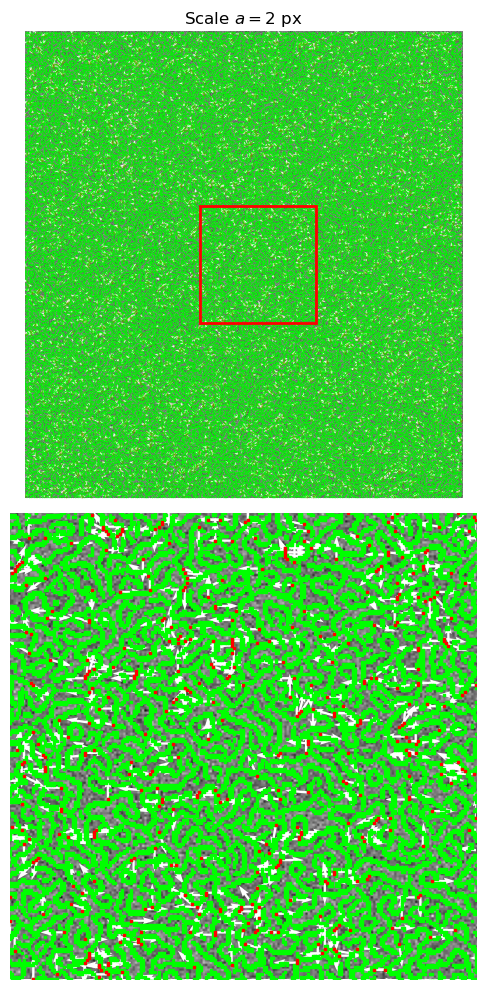

In [293]:
import matplotlib.patches as patches

# Extract the coordinates of WTMMM
x_coords = local_maxima_coords[:, 1]
y_coords = local_maxima_coords[:, 0]

# Calculate U and V components
# U = np.cos(WTMM_angles)
# V = np.sin(WTMM_angles)
U2, V2 = np.gradient(WTMM)

# Create a grid for the quiver plot
x = np.arange(f_x.shape[1])
y = np.arange(f_x.shape[0])
X, Y = np.meshgrid(x, y)

# Subsample the data for plotting (plot every 10th vector)
step = 2
X_sub = X[y_coords, x_coords]
Y_sub = Y[y_coords, x_coords]
U_sub = U2[y_coords, x_coords]
V_sub = V2[y_coords, x_coords]
magnitude = np.sqrt(U_sub**2 + V_sub**2)
magnitude[magnitude == 0] = 1

# Create a figure and axis
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot the original image and quiver plot
axs[0].imshow(data['Phalloidin'],cmap="gray")
axs[0].quiver(X_sub, Y_sub, U_sub/magnitude, V_sub/magnitude, units='width', width=0.002, scale=100, color='white')
axs[0].scatter(WTMM_coords[:, 1], WTMM_coords[:, 0], s=0.01, color='lime', marker="x")
axs[0].scatter(x_coords, y_coords, s=0.01, color='red')
axs[0].set_title(f'Scale $a=${sig1} px')
axs[0].set_xlabel('X-axis')
axs[0].set_ylabel('Y-axis')
axs[0].set_axis_off()
# Plot the zoomed-in region
zoomed_ax = axs[1]
zoomed_ax.imshow(data['Phalloidin'],cmap="gray")
zoomed_ax.quiver(X_sub, Y_sub, U_sub/magnitude, V_sub/magnitude, units='width', width=0.005, scale=20, color='white')
zoomed_ax.scatter(WTMM_coords[:, 1], WTMM_coords[:, 0], s=1, color='lime',marker=",")
zoomed_ax.scatter(x_coords, y_coords, s=2, color='red',marker=",")
zoomed_ax.set_xlim(300, 500)
zoomed_ax.set_ylim(300, 500)
zoomed_ax.invert_yaxis()
# zoomed_ax.set_title('Zoomed-in Region')
zoomed_ax.set_xlabel('X-axis')
zoomed_ax.set_ylabel('Y-axis')
zoomed_ax.set_axis_off()
# Create a Rectangle patch
rect = patches.Rectangle((300,300), 200, 200, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
axs[0].add_patch(rect)
fig.savefig(f"Methods/scale-{sig1}.pdf")
plt.tight_layout()
plt.show()

 The arrows are the normalized vectors of direcetion of maximum change

### PDF of the angles
Next we compute the pdf of the angles and the Anisotropy factor, that is defined by:

$$
F_a = \int_{-\pi}^{\pi} \left| P_a(A) - \frac{1}{2\pi} \right| \, \mathrm{d}A.
$$

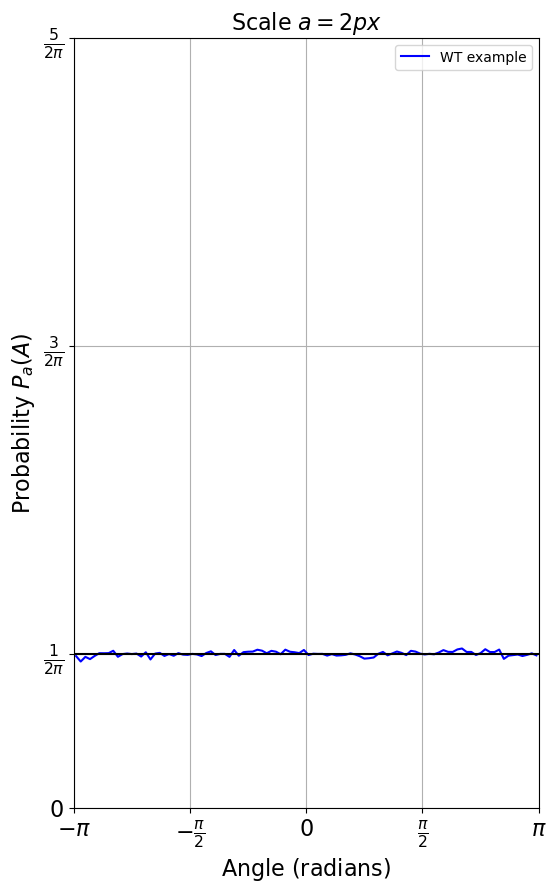

In [298]:

# Calculate the angles 
WTMMM_angles = np.angle(U_sub+ 1j * V_sub)
WTMMM_angles = np.arctan2(V_sub,U_sub)
WTMM_angles = np.angle(f_x+ 1j * f_y)
WTMM_angles = np.arctan2(U,V)

# Compute the histogram
counts, bin_edges = np.histogram(WTMM_angles, bins=100, density=True)

# Compute the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

window_size=5
counts_smooth = np.convolve(counts, np.ones(window_size)/window_size, mode='valid')

# Adjust bin_centers to match the length of rolling_mean
# bin_centers = bin_centers[window_size//2 : -window_size//2 +1]


# Plot the PDF as a line plot
plt.figure(figsize=(6, 10))
plt.plot(bin_centers, counts, linestyle='-', marker='', color='b',label="WT example")
#plt.scatter(0,3,color='white')
# Set x-axis limits to -π to π
plt.xlim(-np.pi, np.pi)

# add 1/(2pi) vlin
plt.hlines(1/np.pi/2,-np.pi,np.pi,color = 'black')

# Set x-axis ticks to π values with bigger font size
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'], fontsize=16)

# # Set y-axis ticks to π values with bigger font size
plt.yticks([ 0, 1/np.pi/2, 3/2/np.pi,5/2/np.pi], 
           [ r'$0$', r'$\frac{1 }{2\pi}$', r'$\frac{3}{2\pi}$',r'$\frac{5}{2\pi}$'], fontsize=16)

# Set title with bigger font size
plt.title(f'Scale $a={sig1} px$', loc="center", fontsize=16)
# plt.text(-0.5,2.8,f'Scale $a={sig1} px$')
plt.xlabel(r'$\text{Angle (radians)}$', fontsize=16)
plt.ylabel(r'Probability $P_{a}(A)$', fontsize=16)
plt.grid(True)
plt.savefig(f'Methods/angles-scale-{sig1}.pdf')
plt.legend(loc='upper right')
plt.show()



Note: there is a peak around 0, it is due to the somite boundaries. As wee can see on the following closeup:


In [295]:
F_a = np.trapz(np.abs(counts-(1/(np.pi*2))),bin_centers)
print(r"Anisotropic Factor (Fa): ",F_a)


Anisotropic Factor (Fa):  0.011883431337146432


In [133]:
#!pandoc Anisotropy-Notebook.ipynb -s -o Reports/Anisotropy_methods.docx


Figure for methods:

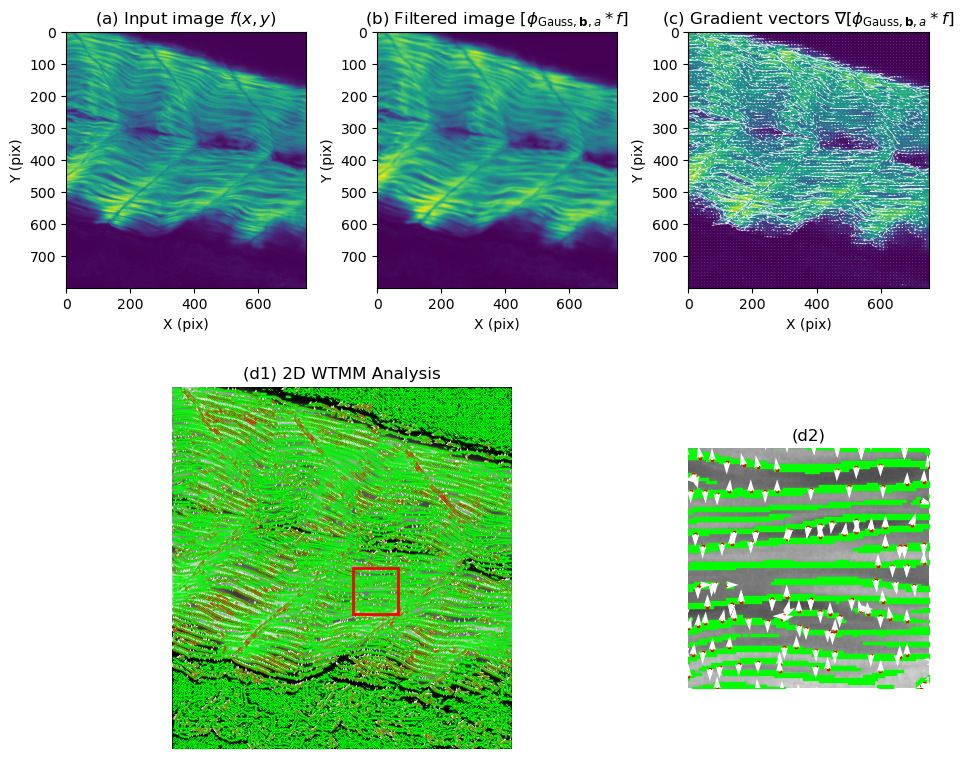

In [273]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Create a new figure with subplots
fig = plt.figure(figsize=(15, 8))

# Create a grid for the subplots
grid = plt.GridSpec(2, 4, width_ratios=[1, 1, 1, 2])

# Plot 1: Input Image
ax1 = plt.subplot(grid[0, 0])
ax1.imshow(data['Phalloidin'])
ax1.set_title(r'(a) Input image $f(x,y)$')
ax1.set_xlabel("X (pix)")
ax1.set_ylabel("Y (pix)")

# Plot 2: Filtered Image
ax2 = plt.subplot(grid[0, 1])
ax2.imshow(Sdata)
ax2.set_title(r'(b) Filtered image $[\phi_{\text{Gauss},\mathbf{b},a} * f]$')
ax2.set_xlabel("X (pix)")
ax2.set_ylabel("Y (pix)")

# Plot 3: Gradient Vectors
step = 10
X, Y = np.meshgrid(np.arange(0, np.shape(Sdata)[1], 1), np.arange(0, np.shape(Sdata)[0], 1))
Q = plt.subplot(grid[0, 2])
Q.quiver(X[::step, ::step], Y[::step, ::step], U[::step, ::step], V[::step, ::step], units='width', width=0.002,
          scale=8000, color="white")
Q.set_title(r'(c) Gradient vectors $\nabla [ \phi_{\text{Gauss},\mathbf{b},a} * f]$')
Q.imshow(data['Phalloidin'])
Q.set_xlabel("X (pix)")
Q.set_ylabel("Y (pix)")

# Plot 4: Original image with quiver plot
ax4 = plt.subplot(grid[1, :2])
ax4.imshow(data['Phalloidin'], cmap="gray")
ax4.quiver(X_sub, Y_sub, U_sub/magnitude, V_sub/magnitude, units='width', width=0.002, scale=100, color='white')
ax4.scatter(WTMM_coords[:, 1], WTMM_coords[:, 0], s=0.01, color='lime', marker="x")
ax4.scatter(local_maxima_coords[:, 1], local_maxima_coords[:, 0], s=0.01, color='red')
ax4.set_title('(d1) 2D WTMM Analysis')
ax4.set_xlabel('X-axis')
ax4.set_ylabel('Y-axis')
ax4.set_axis_off()

# Plot 5: Zoomed-in region
zoomed_ax = plt.subplot(grid[1, 2])
zoomed_ax.imshow(data['Phalloidin'], cmap="gray")
zoomed_ax.scatter(WTMM_coords[:, 1], WTMM_coords[:, 0], s=1, color='lime', marker=",")
zoomed_ax.scatter(local_maxima_coords[:, 1], local_maxima_coords[:, 0], s=2, color='red', marker=",")
zoomed_ax.quiver(X_sub, Y_sub, U_sub/magnitude, V_sub/magnitude, units='width', width=0.02, scale=20, color='white')
zoomed_ax.set_xlim(400, 500)
zoomed_ax.set_ylim(400, 500)
zoomed_ax.set_title('(d2)')
zoomed_ax.set_xlabel('X-axis')
zoomed_ax.set_ylabel('Y-axis')
zoomed_ax.set_axis_off()
zoomed_ax.invert_yaxis()
# Create a Rectangle patch
rect = patches.Rectangle((400,400), 100, 100, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax4.add_patch(rect)

plt.tight_layout()
plt.savefig(f'Methods/images.pdf')
plt.show()
